# Audio Data Collection and Processing
## Formative 2 - Data Preprocessing

This notebook processes audio samples with multiple augmentations and extracts features for each team member.

**Team Members:**
1. Erneste
2. Thierry
3. Rodas
4. Idara

**Required phrases:**
- "Yes, approve"
- "Confirm transaction"

---

## What This Notebook Does:
1. Loads audio files from existing `Audios/` folder at project root
2. Creates `Augmented_Audios/` and `Visualizations/` folders inside Audio_Processing_Notebook
3. Loads and displays audio waveforms and spectrograms
4. Applies 3 augmentations per sample (pitch shift, time stretch, background noise)
5. Extracts audio features (MFCCs, spectral roll-off, energy) into audio_features.csv
6. Saves all visualizations in organized folders

**Simply run all cells and the notebook will handle everything!**

## 1. Import Required Libraries

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

print("Audio processing libraries imported successfully!")

Audio processing libraries imported successfully!


## 2. Configuration & Directory Setup

In [14]:
# Get the current directory (Audio_Processing_Notebook)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent  # Project root directory

print(f"Project Root Directory: {ROOT_DIR}")
print(f"Notebook Directory: {NOTEBOOK_DIR}\n")

# Configuration - Audios from project root, outputs in notebook directory
AUDIOS_DIR = ROOT_DIR / "Audios" 
OUTPUT_CSV = NOTEBOOK_DIR / "audio_features.csv"
AUGMENTED_DIR = NOTEBOOK_DIR / "Augmented_Audios"
VISUALIZATIONS_DIR = NOTEBOOK_DIR / "Visualizations"

# Team members and phrases
TEAM_MEMBERS = ["Erneste", "Thierry", "Rodas", "Idara"]
PHRASES = ["yes_approve", "confirm_transaction"]
AUDIO_EXTENSIONS = ['.m4a', '.wav', '.mp3', '.flac']

print("Configuration:")
print(f"  Audios Directory: {AUDIOS_DIR}")
print(f"  Output CSV: {OUTPUT_CSV}")
print(f"  Augmented Directory: {AUGMENTED_DIR}")
print(f"  Visualizations Directory: {VISUALIZATIONS_DIR}")
print(f"  Team Members: {', '.join(TEAM_MEMBERS)}")
print(f"  Phrases: {', '.join(PHRASES)}")

Project Root Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing
Notebook Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook

Configuration:
  Audios Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audios
  Output CSV: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook\audio_features.csv
  Augmented Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook\Augmented_Audios
  Visualizations Directory: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook\Visualizations
  Team Members: Erneste, Thierry, Rodas, Idara
  Phrases: yes_approve, confirm_transaction


## 3. Create Output Directories in Notebook Folder

In [15]:
# Create output directories inside notebook folder
AUGMENTED_DIR.mkdir(parents=True, exist_ok=True)
VISUALIZATIONS_DIR.mkdir(parents=True, exist_ok=True)

print("Directories created/verified:")
print(f"  Audios source: {AUDIOS_DIR}")
print(f"  Augmented output: {AUGMENTED_DIR}")
print(f"  Visualizations: {VISUALIZATIONS_DIR}")

# Check if Audios directory exists
if not AUDIOS_DIR.exists():
    print(f"\nERROR: Audios directory not found at {AUDIOS_DIR}")
    print(f"Please ensure the 'Audios' folder exists at the project root with your audio files.")
else:
    print(f"\nAudios directory found at project root!")
    print(f"\nAudio files should be in format: MemberName_phrase.extension")
    print(f"Example: Erneste_yes_approve.wav")

Directories created/verified:
  Audios source: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audios
  Augmented output: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook\Augmented_Audios
  Visualizations: c:\Users\LENOVO\Desktop\Formative-2__Data-Preprocessing\Audio_Processing_Notebook\Visualizations

Audios directory found at project root!

Audio files should be in format: MemberName_phrase.extension
Example: Erneste_yes_approve.wav


## 4. Check for Audio Files

In [16]:
def find_audio_files():
    """Find all audio files for team members and phrases"""
    missing_audios = []
    existing_audios = []
    
    if AUDIOS_DIR.exists():
        for member in TEAM_MEMBERS:
            for phrase in PHRASES:
                # Try different file extensions
                found = False
                for ext in AUDIO_EXTENSIONS:
                    filename = f"{member}_{phrase}{ext}"
                    filepath = AUDIOS_DIR / filename
                    
                    if filepath.exists():
                        existing_audios.append((member, phrase, filename, filepath))
                        found = True
                        break
                
                if not found:
                    missing_audios.append((member, phrase))
    else:
        print(f"Audios directory not found: {AUDIOS_DIR}")
    
    return existing_audios, missing_audios

# Check which audio files exist
existing_audios, missing_audios = find_audio_files()

print(f"\n{'='*60}")
print("AUDIO INVENTORY")
print(f"{'='*60}")
print(f"Found: {len(existing_audios)} audio files")
print(f"Missing: {len(missing_audios)} audio files")

if existing_audios:
    print(f"\nAvailable Audios:")
    for member, phrase, filename, filepath in existing_audios:
        print(f"  {filename}")

if missing_audios:
    print(f"\nMissing Audios:")
    for member, phrase in missing_audios:
        print(f"  {member}_{phrase}.m4a/wav/mp3 ({member} - {phrase})")

print(f"{'='*60}\n")

if not existing_audios:
    print("No audio files found! Please add audio files to the Audios folder at project root.")
else:
    print(f"Ready to process {len(existing_audios)} audio files!")


AUDIO INVENTORY
Found: 6 audio files
Missing: 2 audio files

Available Audios:
  Erneste_yes_approve.wav
  Erneste_confirm_transaction.wav
  Thierry_yes_approve.wav
  Thierry_confirm_transaction.wav
  Idara_yes_approve.wav
  Idara_confirm_transaction.wav

Missing Audios:
  Rodas_yes_approve.m4a/wav/mp3 (Rodas - yes_approve)
  Rodas_confirm_transaction.m4a/wav/mp3 (Rodas - confirm_transaction)

Ready to process 6 audio files!


## 5. Load and Display Audio Waveforms & Spectrograms

Loading and visualizing audio files...

Processing: Erneste_yes_approve.wav


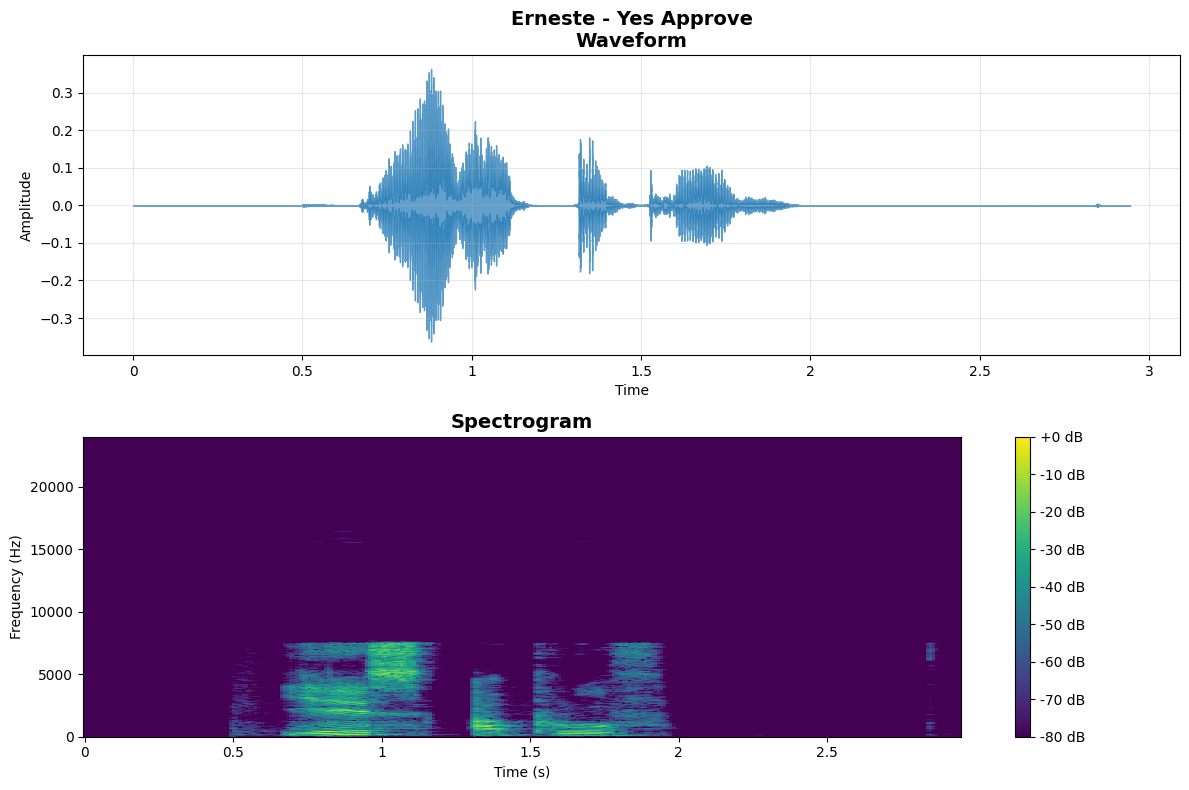

  Loaded: Erneste_yes_approve.wav
  Duration: 2.94 seconds, Sample Rate: 48000 Hz
  Saved visualization: Erneste_yes_approve_visualization.png

Processing: Erneste_confirm_transaction.wav


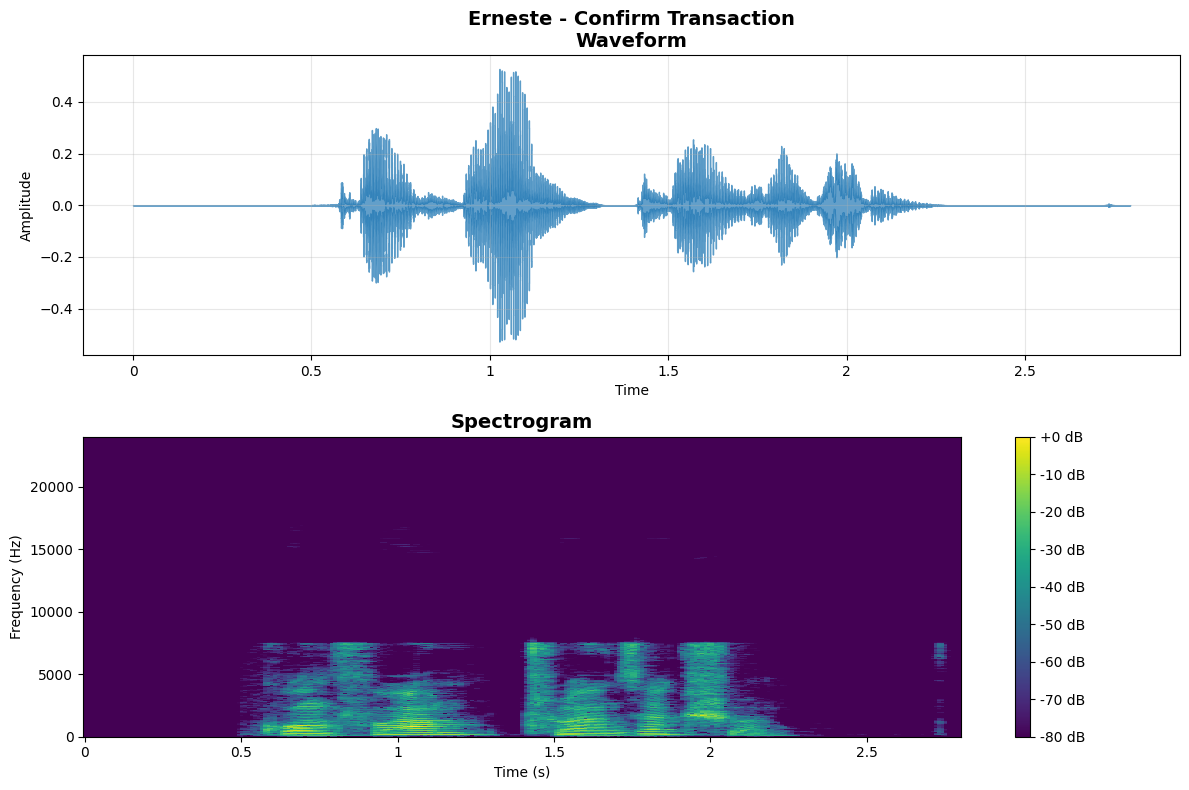

  Loaded: Erneste_confirm_transaction.wav
  Duration: 2.79 seconds, Sample Rate: 48000 Hz
  Saved visualization: Erneste_confirm_transaction_visualization.png

Processing: Thierry_yes_approve.wav


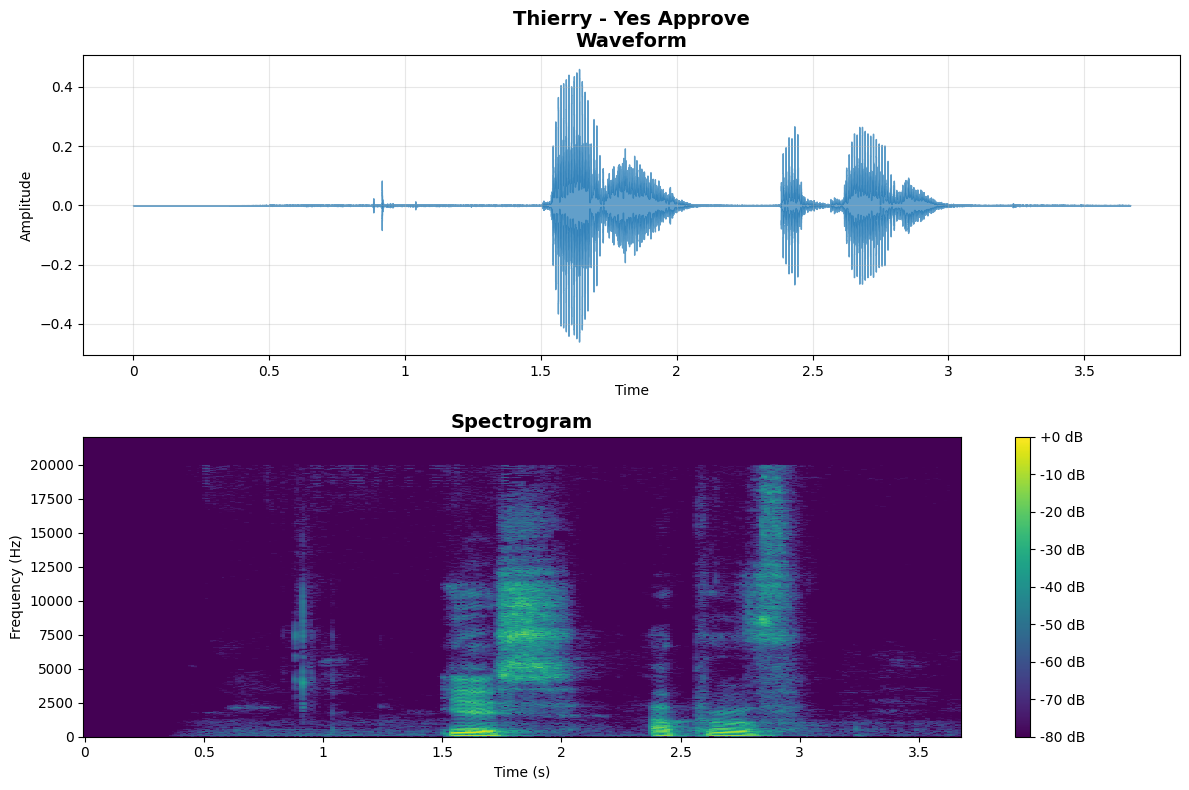

  Loaded: Thierry_yes_approve.wav
  Duration: 3.67 seconds, Sample Rate: 44100 Hz
  Saved visualization: Thierry_yes_approve_visualization.png

Processing: Thierry_confirm_transaction.wav


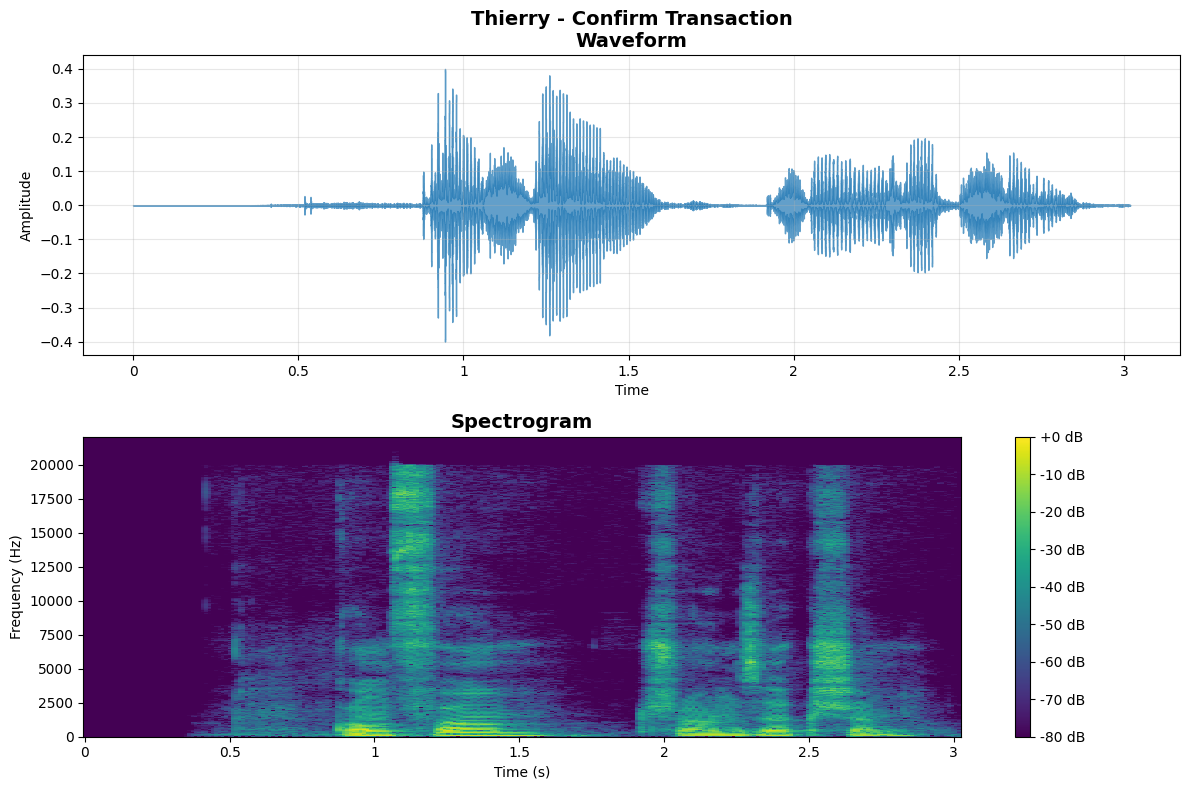

  Loaded: Thierry_confirm_transaction.wav
  Duration: 3.02 seconds, Sample Rate: 44100 Hz
  Saved visualization: Thierry_confirm_transaction_visualization.png

Processing: Idara_yes_approve.wav


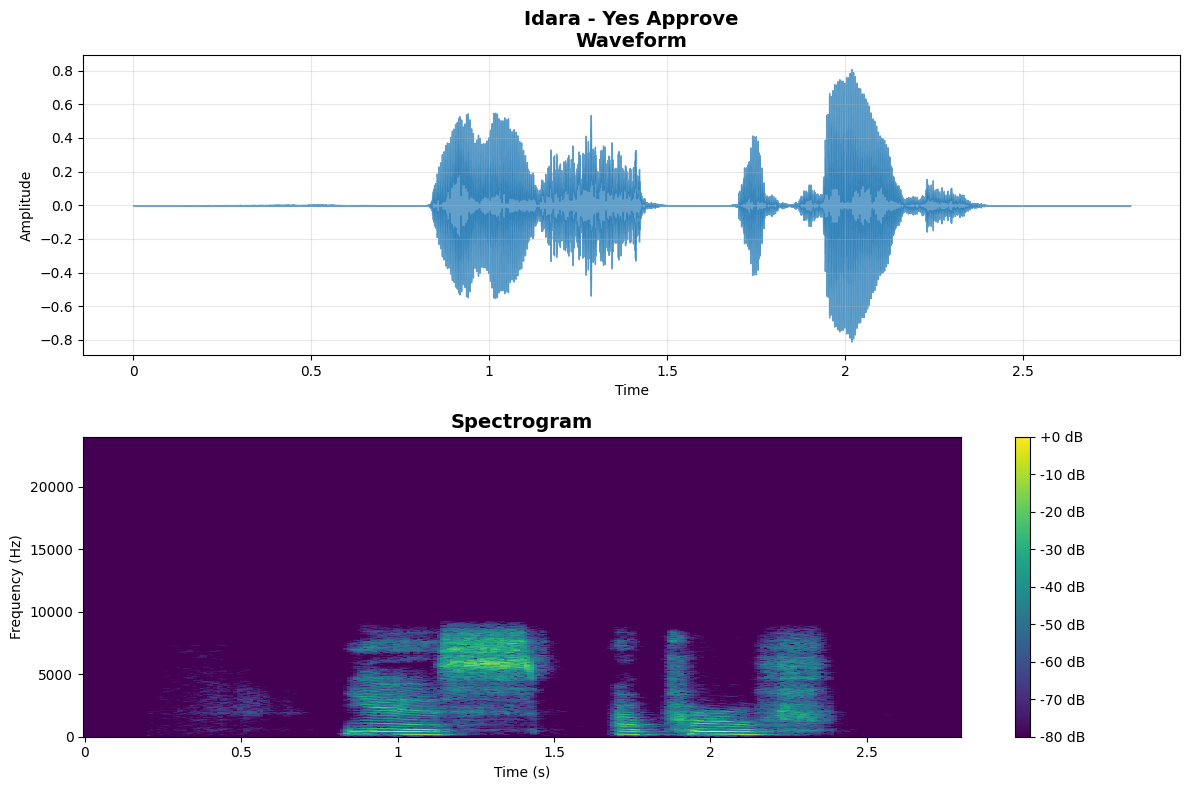

  Loaded: Idara_yes_approve.wav
  Duration: 2.80 seconds, Sample Rate: 48000 Hz
  Saved visualization: Idara_yes_approve_visualization.png

Processing: Idara_confirm_transaction.wav


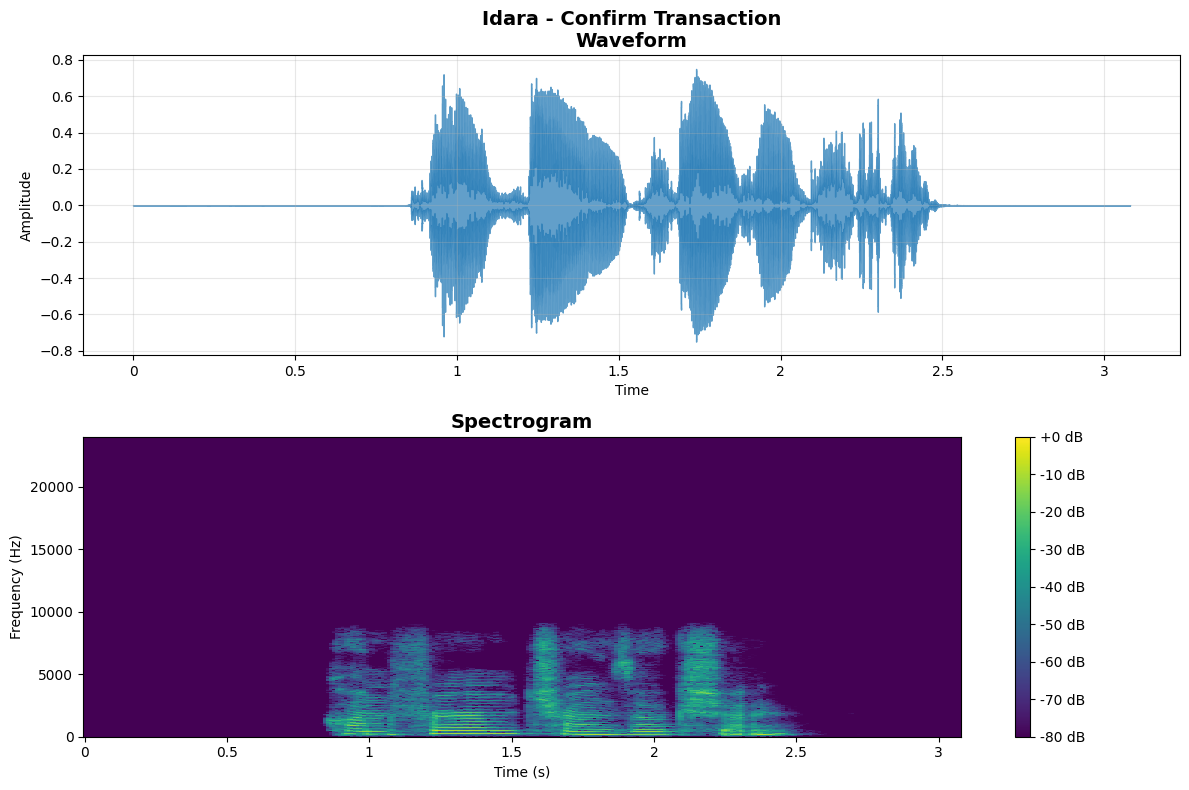

  Loaded: Idara_confirm_transaction.wav
  Duration: 3.08 seconds, Sample Rate: 48000 Hz
  Saved visualization: Idara_confirm_transaction_visualization.png



In [17]:
def load_and_visualize_audio(audio_path, member, phrase, filename):
    """Load audio file and create visualization"""
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)
        
        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Plot waveform
        librosa.display.waveshow(y, sr=sr, ax=ax1, alpha=0.7)
        ax1.set_title(f'{member} - {phrase.replace("_", " ").title()}\nWaveform', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Amplitude')
        ax1.grid(True, alpha=0.3)
        
        # Plot spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=ax2, cmap='viridis')
        ax2.set_title('Spectrogram', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Frequency (Hz)')
        ax2.set_xlabel('Time (s)')
        
        # Add colorbar for spectrogram
        plt.colorbar(img, ax=ax2, format='%+2.0f dB')
        
        plt.tight_layout()
        
        # Save visualization in visualizations folder
        save_path = VISUALIZATIONS_DIR / f"{member}_{phrase}_visualization.png"
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"  Loaded: {filename}")
        print(f"  Duration: {len(y)/sr:.2f} seconds, Sample Rate: {sr} Hz")
        print(f"  Saved visualization: {save_path.name}")
        
        return y, sr
        
    except Exception as e:
        print(f"  Error loading {filename}: {str(e)}")
        return None, None

if existing_audios:
    print("Loading and visualizing audio files...\n")
    
    # Store loaded audio data
    audio_data = {}
    
    for member, phrase, filename, filepath in existing_audios:
        print(f"Processing: {filename}")
        y, sr = load_and_visualize_audio(filepath, member, phrase, filename)
        
        if y is not None and sr is not None:
            key = f"{member}_{phrase}"
            audio_data[key] = {'audio': y, 'sr': sr, 'filename': filename}
        
        print()
else:
    print("No audio files to display!")

## 6. Define Audio Augmentation Functions

In [18]:
def apply_audio_augmentations(y, sr, base_filename):
    """
    Apply 3 different augmentations to an audio sample
    Returns: list of (augmented_audio, augmentation_name, filename) tuples
    """
    augmented = []
    
    # 1. Pitch Shift (increase by 2 semitones)
    y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    augmented.append((y_pitch, "Pitch_Shift_+2st", f"{base_filename}_pitch_shift.wav"))
    
    # 2. Time Stretch (speed up by 20%)
    y_time = librosa.effects.time_stretch(y, rate=1.2)
    augmented.append((y_time, "Time_Stretch_1.2x", f"{base_filename}_time_stretch.wav"))
    
    # 3. Add Background Noise
    noise = np.random.normal(0, 0.005, len(y))  # Small amount of Gaussian noise
    y_noise = y + noise
    augmented.append((y_noise, "Background_Noise", f"{base_filename}_with_noise.wav"))
    
    return augmented

print("Audio augmentation functions defined")
print("  Augmentations: Pitch Shift (+2 semitones), Time Stretch (1.2x), Background Noise")

Audio augmentation functions defined
  Augmentations: Pitch Shift (+2 semitones), Time Stretch (1.2x), Background Noise


## 7. Define Audio Feature Extraction Function

In [19]:
def extract_audio_features(y, sr, member, phrase, augmentation):
    """
    Extract multiple features from an audio sample:
    - MFCCs (13 coefficients)
    - Spectral Roll-off
    - Energy/RMS
    - Zero Crossing Rate
    - Spectral Centroid
    - Chroma Features
    """
    features = {
        'member': member,
        'phrase': phrase,
        'augmentation': augmentation,
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'sample_rate': sr,
        'duration': len(y) / sr
    }
    
    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    for i in range(13):
        features[f'mfcc_{i}'] = mfccs_mean[i]
    
    # MFCCs standard deviation
    mfccs_std = np.std(mfccs, axis=1)
    for i in range(13):
        features[f'mfcc_std_{i}'] = mfccs_std[i]
    
    # Spectral Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['spectral_rolloff_mean'] = np.mean(rolloff)
    features['spectral_rolloff_std'] = np.std(rolloff)
    
    # Energy/RMS
    rms = librosa.feature.rms(y=y)
    features['energy_mean'] = np.mean(rms)
    features['energy_std'] = np.std(rms)
    
    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['zcr_mean'] = np.mean(zcr)
    features['zcr_std'] = np.std(zcr)
    
    # Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid_mean'] = np.mean(centroid)
    features['spectral_centroid_std'] = np.std(centroid)
    
    # Chroma Features (12 chroma bins)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    for i in range(12):
        features[f'chroma_{i}'] = chroma_mean[i]
    
    return features

print("Audio feature extraction function defined")

Audio feature extraction function defined


## 8. Process All Audio Files - Main Execution

In [20]:
def apply_audio_augmentations(y, sr, base_filename):
    """
    Apply 3 different augmentations to an audio sample
    Returns: list of (augmented_audio, augmentation_name, filename) tuples
    """
    augmented = []
    
    try:
        # 1. Pitch Shift (increase by 2 semitones)
        y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
        augmented.append((y_pitch, "Pitch_Shift_+2st", f"{base_filename}_pitch_shift.wav"))
    except Exception as e:
        print(f"    Warning: Pitch shift failed - {str(e)}")
        # Fallback: use original audio
        augmented.append((y, "Pitch_Shift_Fallback", f"{base_filename}_pitch_shift.wav"))
    
    try:
        # 2. Time Stretch (speed up by 20%)
        y_time = librosa.effects.time_stretch(y, rate=1.2)
        augmented.append((y_time, "Time_Stretch_1.2x", f"{base_filename}_time_stretch.wav"))
    except Exception as e:
        print(f"    Warning: Time stretch failed - {str(e)}")
        # Fallback: use original audio
        augmented.append((y, "Time_Stretch_Fallback", f"{base_filename}_time_stretch.wav"))
    
    try:
        # 3. Add Background Noise
        noise = np.random.normal(0, 0.005, len(y))  # Small amount of Gaussian noise
        y_noise = y + noise
        augmented.append((y_noise, "Background_Noise", f"{base_filename}_with_noise.wav"))
    except Exception as e:
        print(f"    Warning: Background noise failed - {str(e)}")
        # Fallback: use original audio
        augmented.append((y, "Background_Noise_Fallback", f"{base_filename}_with_noise.wav"))
    
    return augmented

# Now run the main processing with better error handling
if not existing_audios:
    print("ERROR: No audio files found to process!")
    print("Please add audio files to the 'Audios/' directory at project root and rerun this cell.")
else:
    print(f"\n{'='*60}")
    print("STARTING AUDIO PROCESSING")
    print(f"{'='*60}\n")
    
    # Process each audio file
    all_features = []
    
    for member, phrase, filename, filepath in existing_audios:
        print(f"Processing: {filename}")
        
        try:
            # Load audio file
            y, sr = librosa.load(filepath, sr=None)
            
            if y is None or len(y) == 0:
                print(f"  Failed to load {filename} - empty audio")
                continue
            
            print(f"  Loaded audio: {len(y)} samples, {sr} Hz sample rate")
            
            # Extract features from original audio
            base_name = filename.rsplit('.', 1)[0]
            features_original = extract_audio_features(y, sr, member, phrase, "Original")
            all_features.append(features_original)
            print(f"  Extracted features from original")
            
            # Apply augmentations
            augmented_list = apply_audio_augmentations(y, sr, base_name)
            print(f"  Applied {len(augmented_list)} augmentations")
            
            # Save augmented audios and extract features
            successful_augmentations = 0
            for aug_audio, aug_name, aug_filename in augmented_list:
                try:
                    # Save augmented audio
                    aug_path = AUGMENTED_DIR / aug_filename
                    sf.write(str(aug_path), aug_audio, sr)
                    
                    # Extract features
                    features_aug = extract_audio_features(aug_audio, sr, member, phrase, aug_name)
                    all_features.append(features_aug)
                    successful_augmentations += 1
                    
                except Exception as e:
                    print(f"    Failed to process {aug_name}: {str(e)}")
            
            print(f"  Saved {successful_augmentations} augmented audios to '{AUGMENTED_DIR.name}/'")
            print(f"  Total feature sets: {len(augmented_list) + 1} (1 original + {len(augmented_list)} augmented)\n")
            
        except Exception as e:
            print(f"  Error processing {filename}: {str(e)}")
            continue
    
    if all_features:
        # Save features to CSV
        df_features = pd.DataFrame(all_features)
        df_features.to_csv(str(OUTPUT_CSV), index=False)
        
        print(f"\n{'='*60}")
        print("PROCESSING COMPLETE")
        print(f"{'='*60}")
        print(f"  Total audio files processed: {len(existing_audios)}")
        print(f"  Total feature sets extracted: {len(all_features)}")
        print(f"  Features saved to: {OUTPUT_CSV.name}")
        print(f"  Augmented audios saved to: {AUGMENTED_DIR.name}/")
        print(f"  Feature CSV contains {len(df_features.columns)} columns")
        print(f"{'='*60}\n")
    else:
        print(f"\n{'='*60}")
        print("PROCESSING FAILED")
        print(f"{'='*60}")
        print("No features were extracted. Please check the audio files and try again.")
        print(f"{'='*60}\n")


STARTING AUDIO PROCESSING

Processing: Erneste_yes_approve.wav
  Loaded audio: 141312 samples, 48000 Hz sample rate
  Extracted features from original
  Applied 3 augmentations
  Saved 3 augmented audios to 'Augmented_Audios/'
  Total feature sets: 4 (1 original + 3 augmented)

Processing: Erneste_confirm_transaction.wav
  Loaded audio: 134144 samples, 48000 Hz sample rate
  Extracted features from original
  Applied 3 augmentations
  Saved 3 augmented audios to 'Augmented_Audios/'
  Total feature sets: 4 (1 original + 3 augmented)

Processing: Thierry_yes_approve.wav
  Loaded audio: 161792 samples, 44100 Hz sample rate
  Extracted features from original
  Applied 3 augmentations
  Saved 3 augmented audios to 'Augmented_Audios/'
  Total feature sets: 4 (1 original + 3 augmented)

Processing: Thierry_confirm_transaction.wav
  Loaded audio: 133120 samples, 44100 Hz sample rate
  Extracted features from original
  Applied 3 augmentations
  Saved 3 augmented audios to 'Augmented_Audios/'


## 9. Create Augmentation Visualizations for All Members

Creating augmentation visualizations for all members...

Creating augmentation visualization for: Erneste_yes_approve.wav


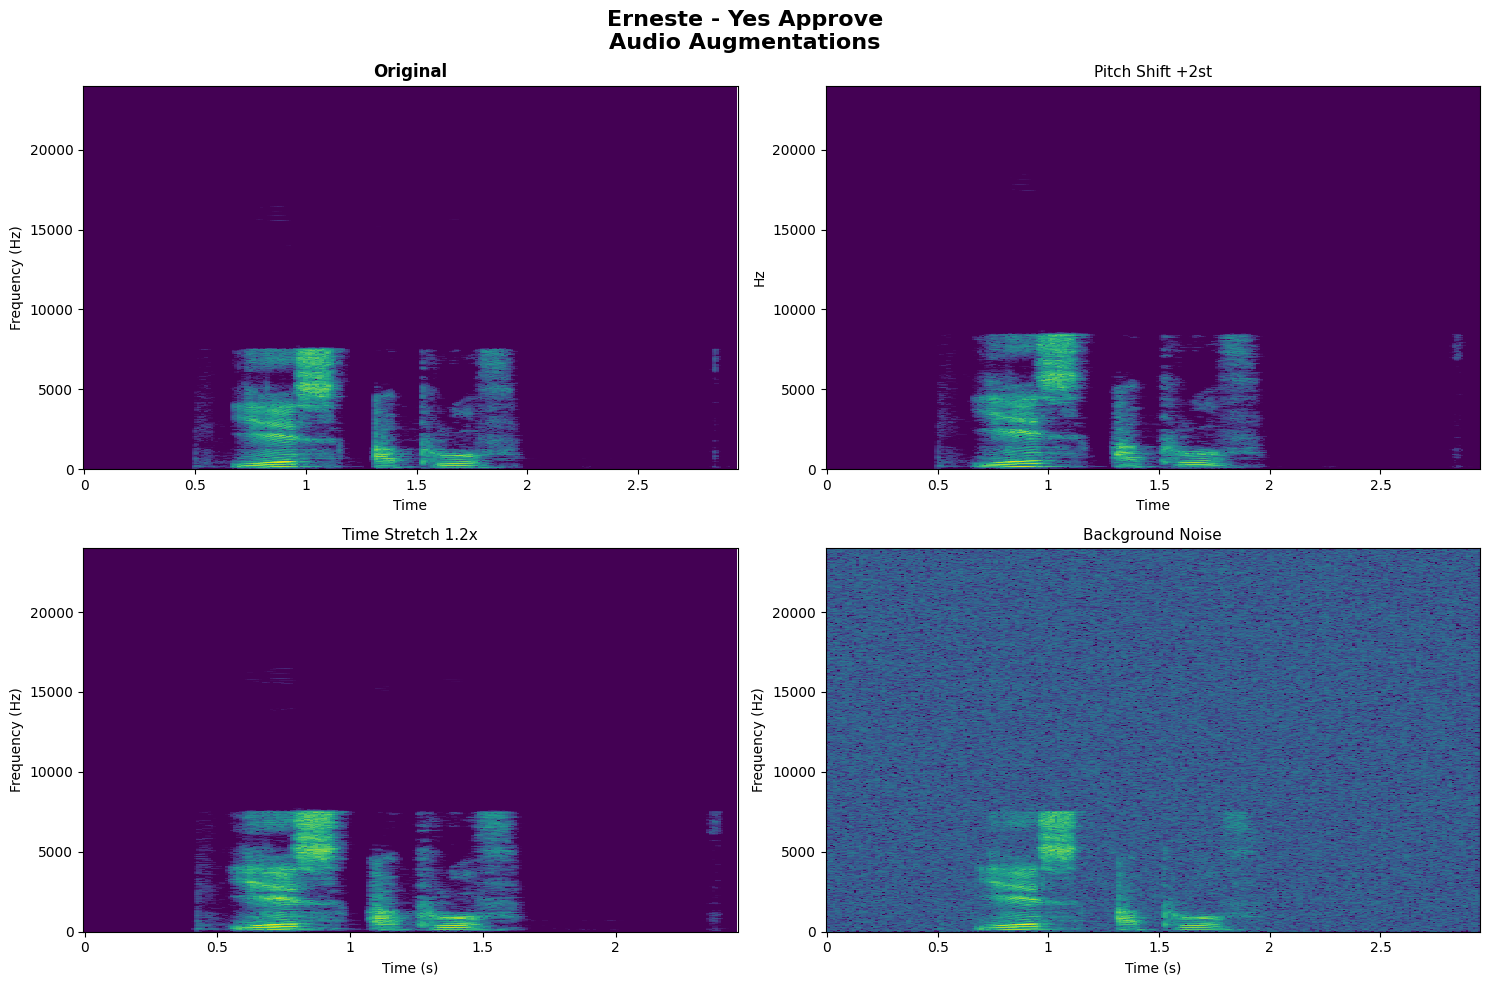

  Saved: Erneste_yes_approve_augmentations.png
Creating augmentation visualization for: Erneste_confirm_transaction.wav


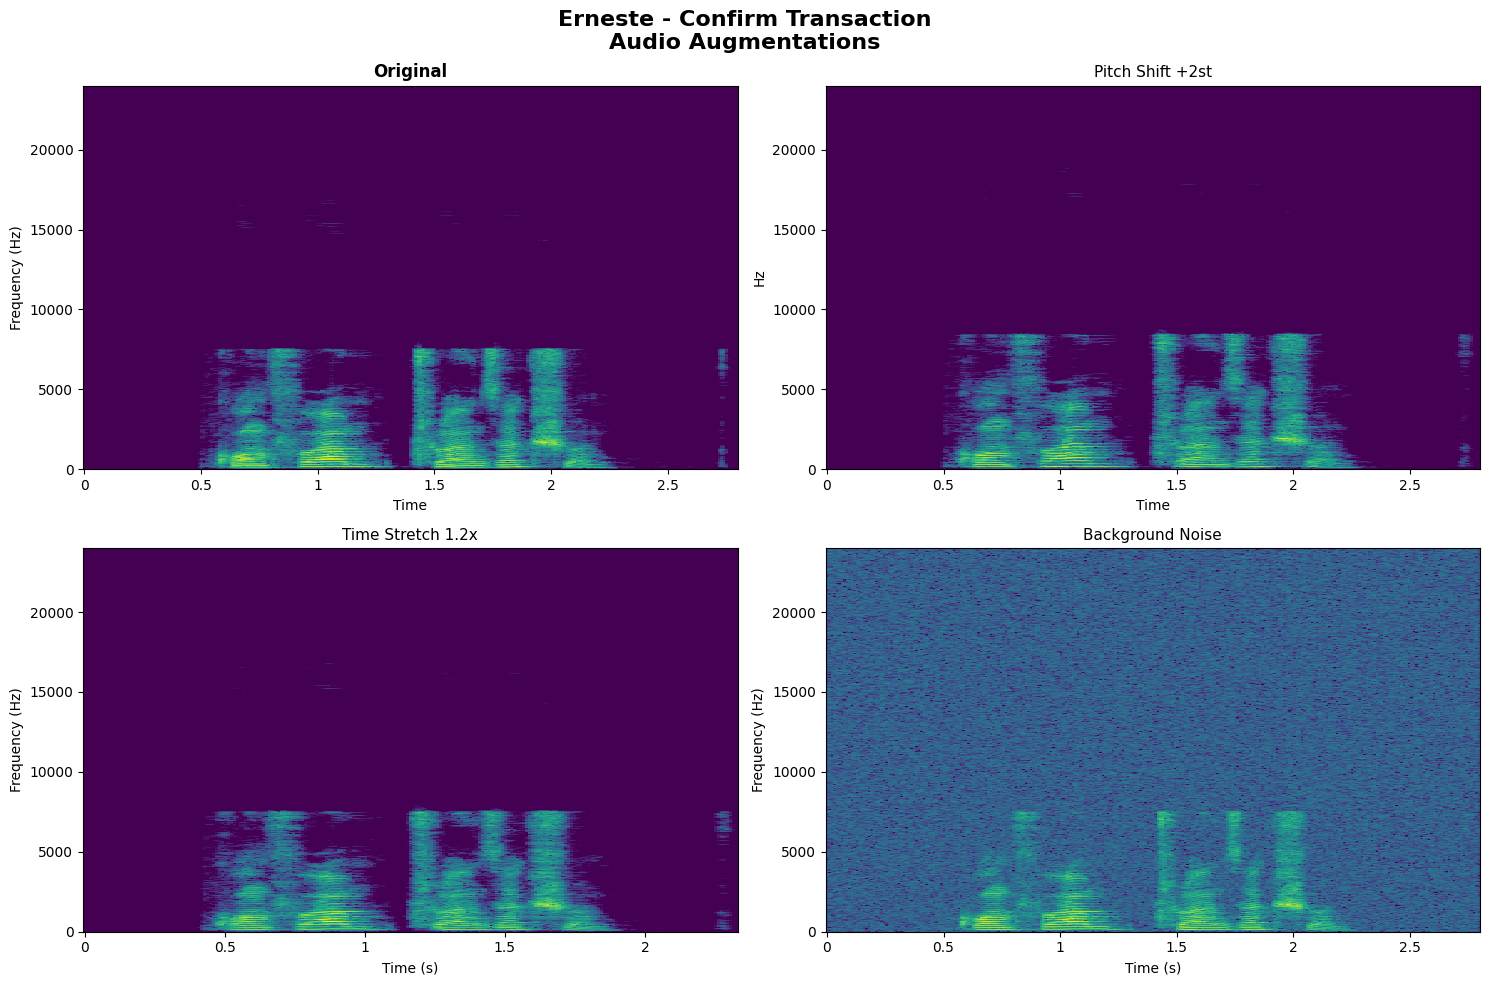

  Saved: Erneste_confirm_transaction_augmentations.png
Creating augmentation visualization for: Thierry_yes_approve.wav


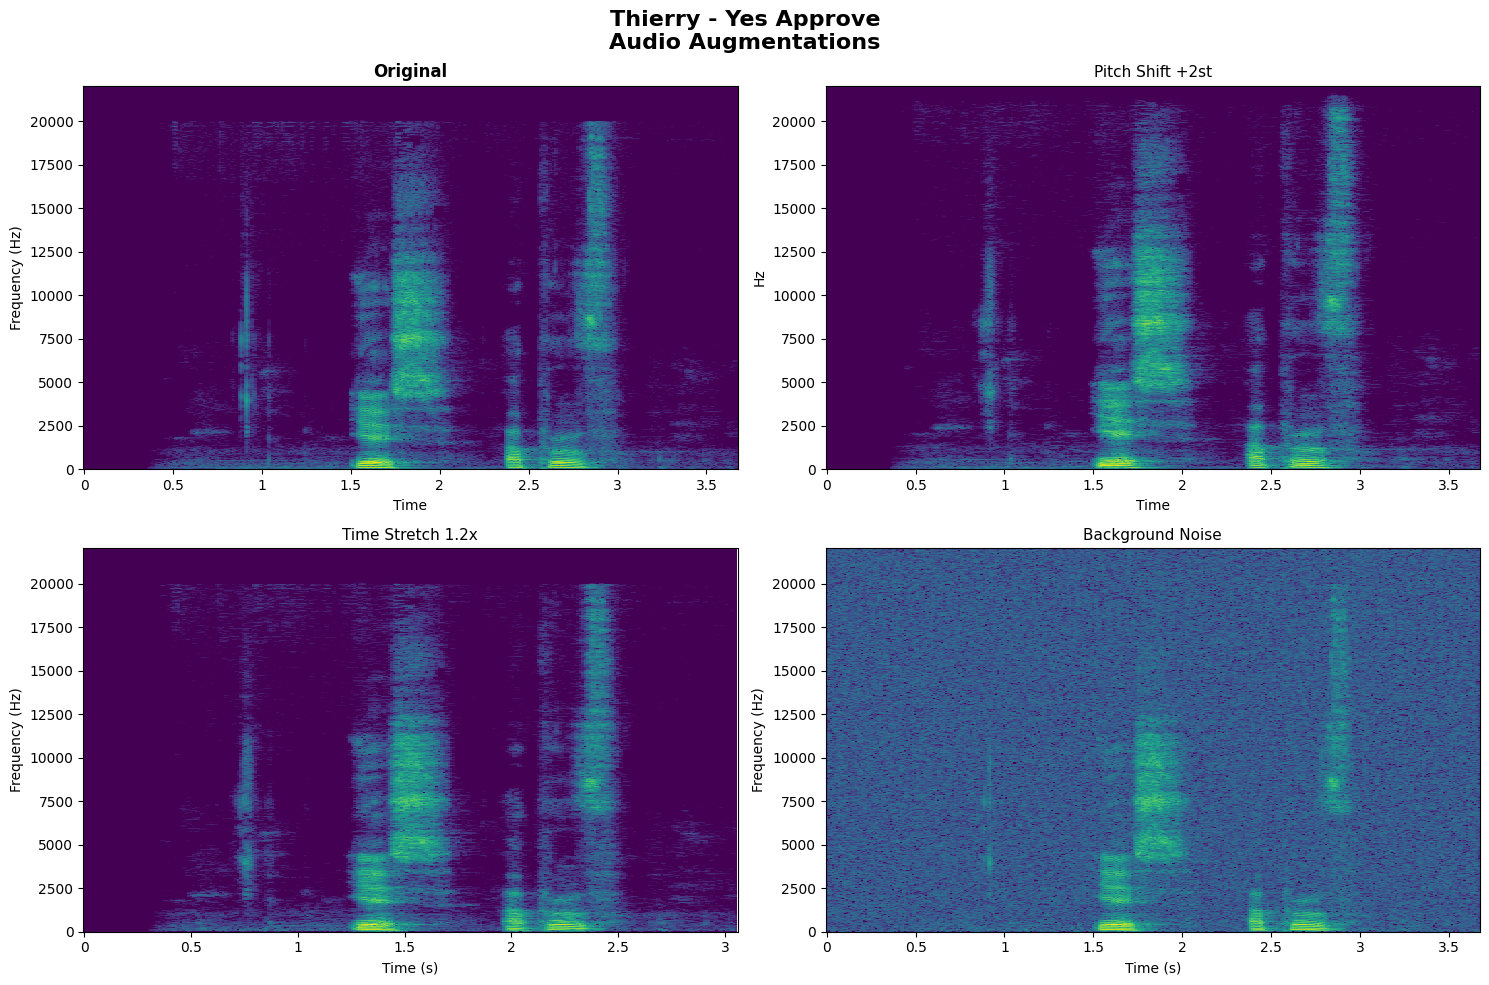

  Saved: Thierry_yes_approve_augmentations.png
Creating augmentation visualization for: Thierry_confirm_transaction.wav


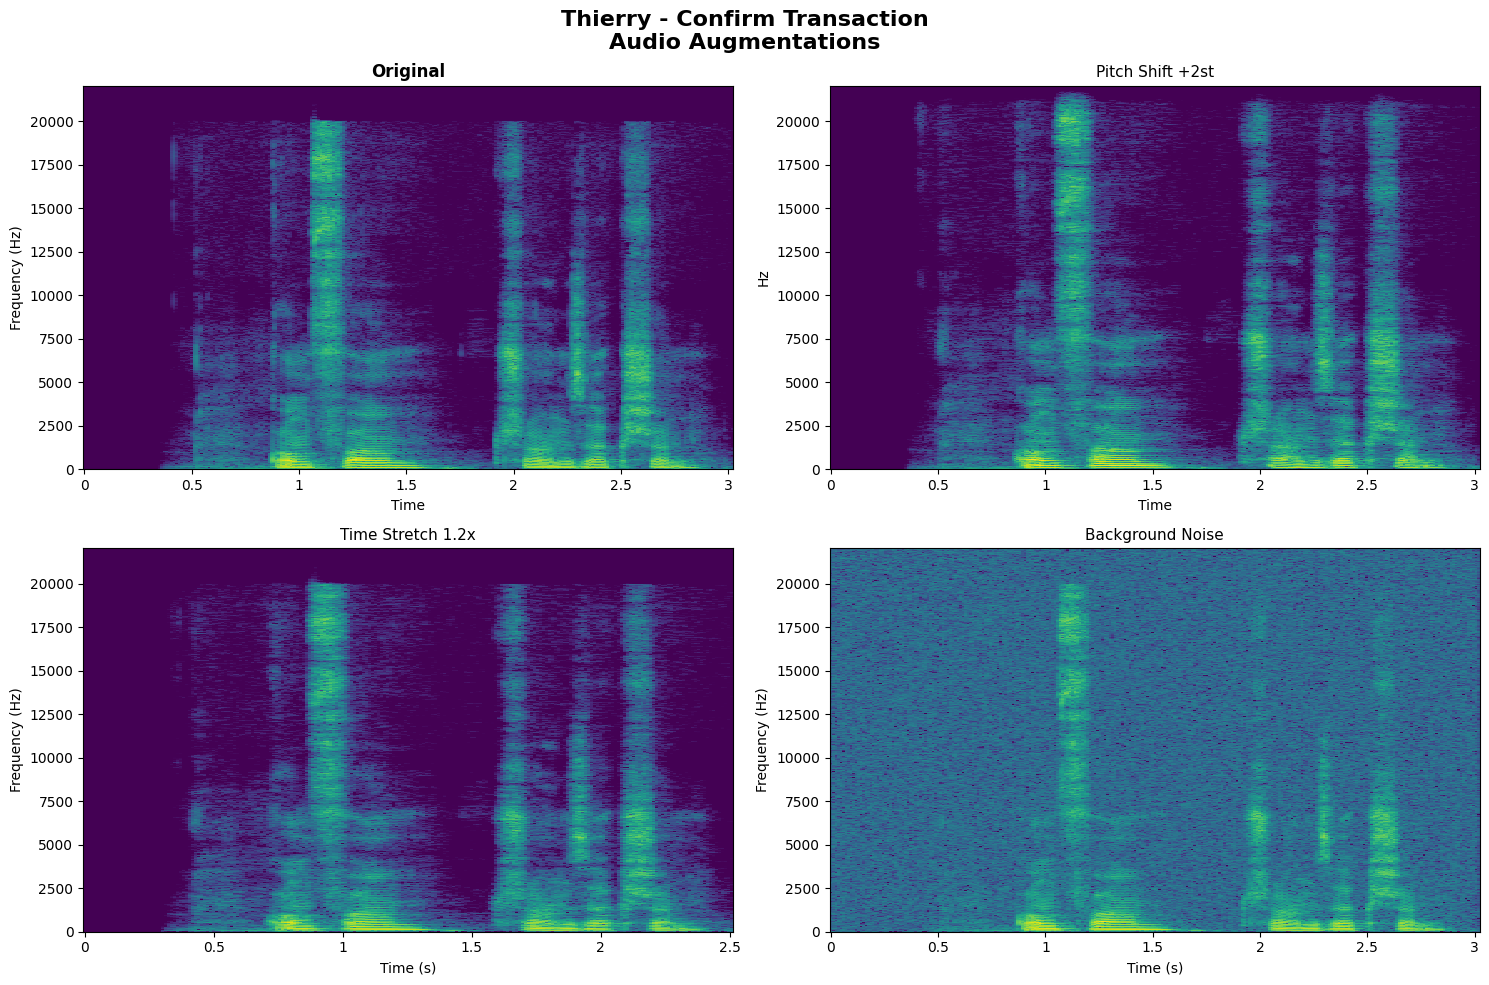

  Saved: Thierry_confirm_transaction_augmentations.png
Creating augmentation visualization for: Idara_yes_approve.wav


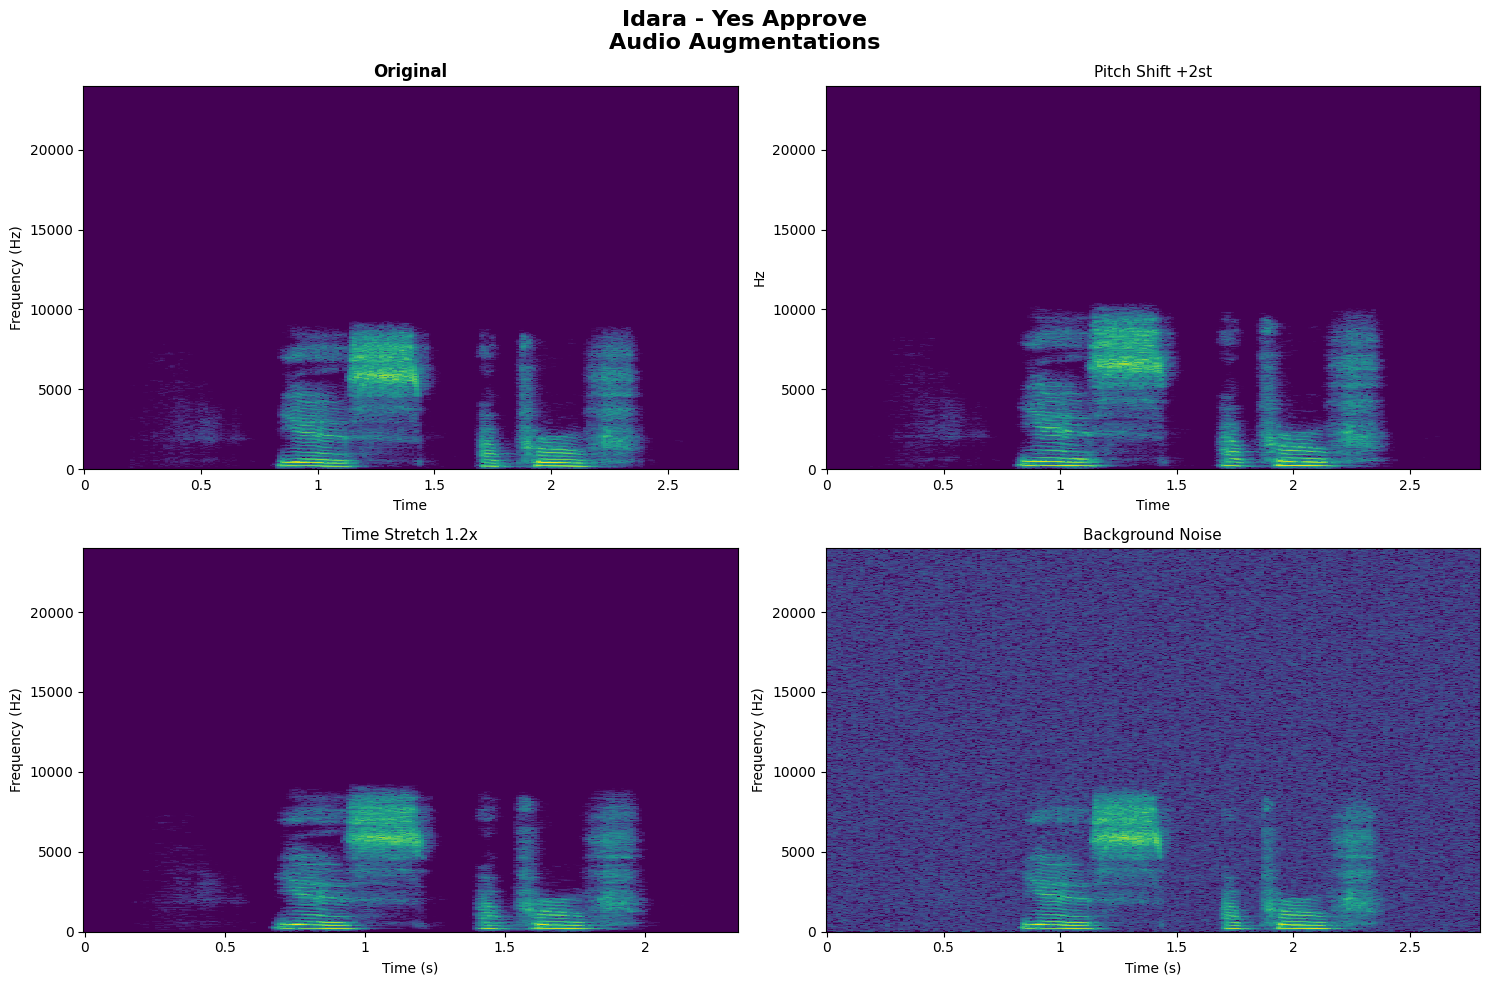

  Saved: Idara_yes_approve_augmentations.png
Creating augmentation visualization for: Idara_confirm_transaction.wav


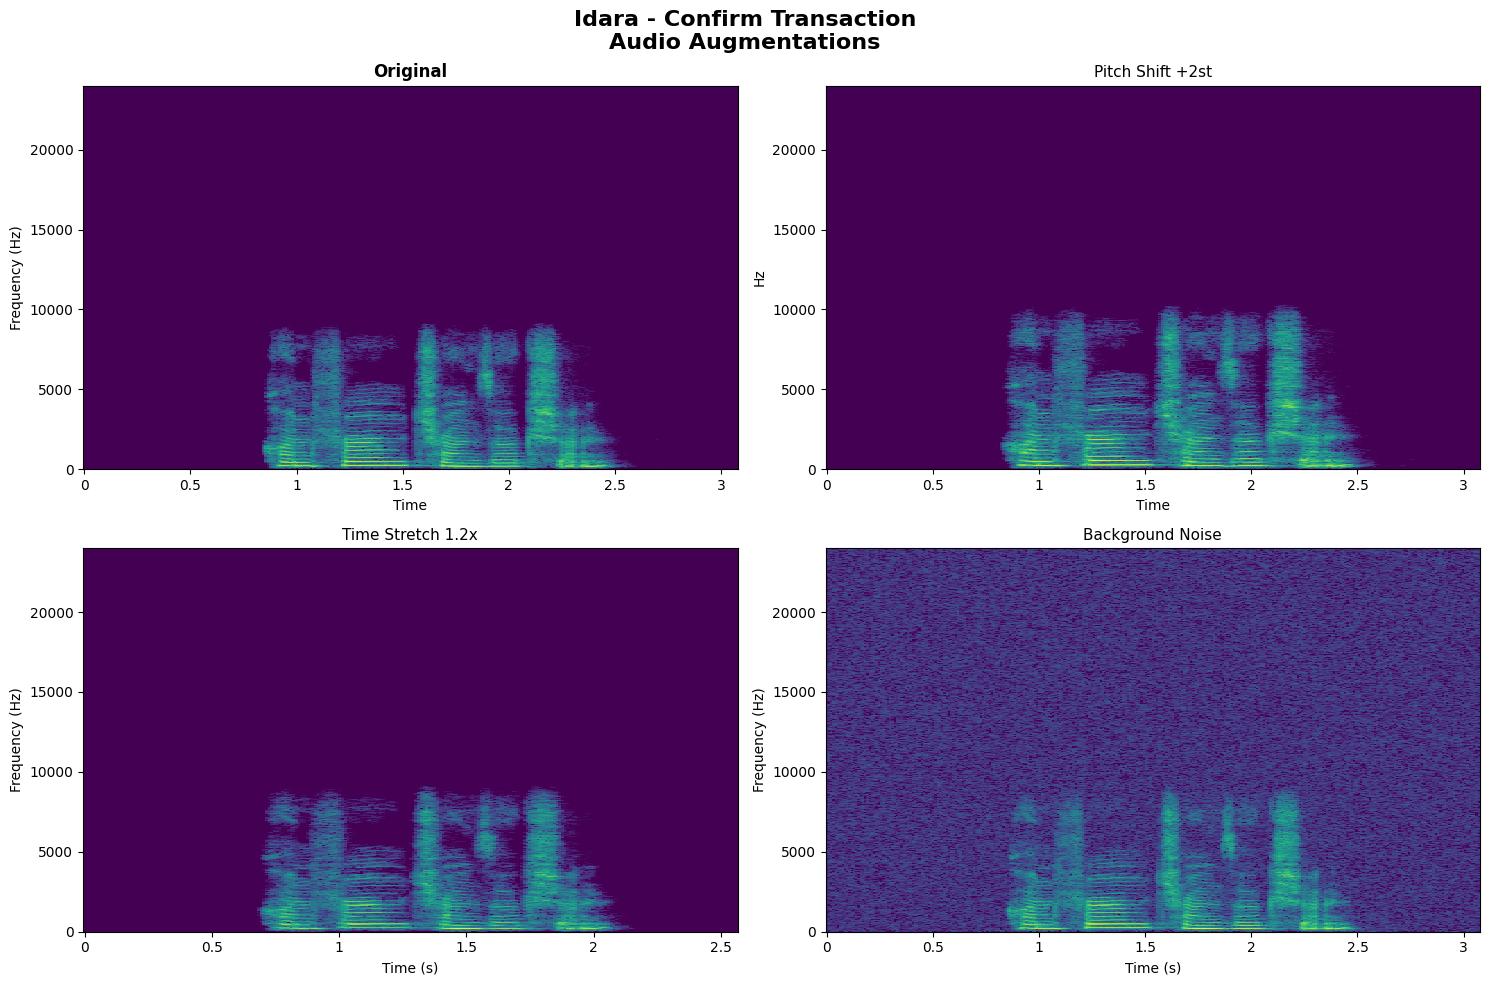

  Saved: Idara_confirm_transaction_augmentations.png

Creating combined visualization for all members...


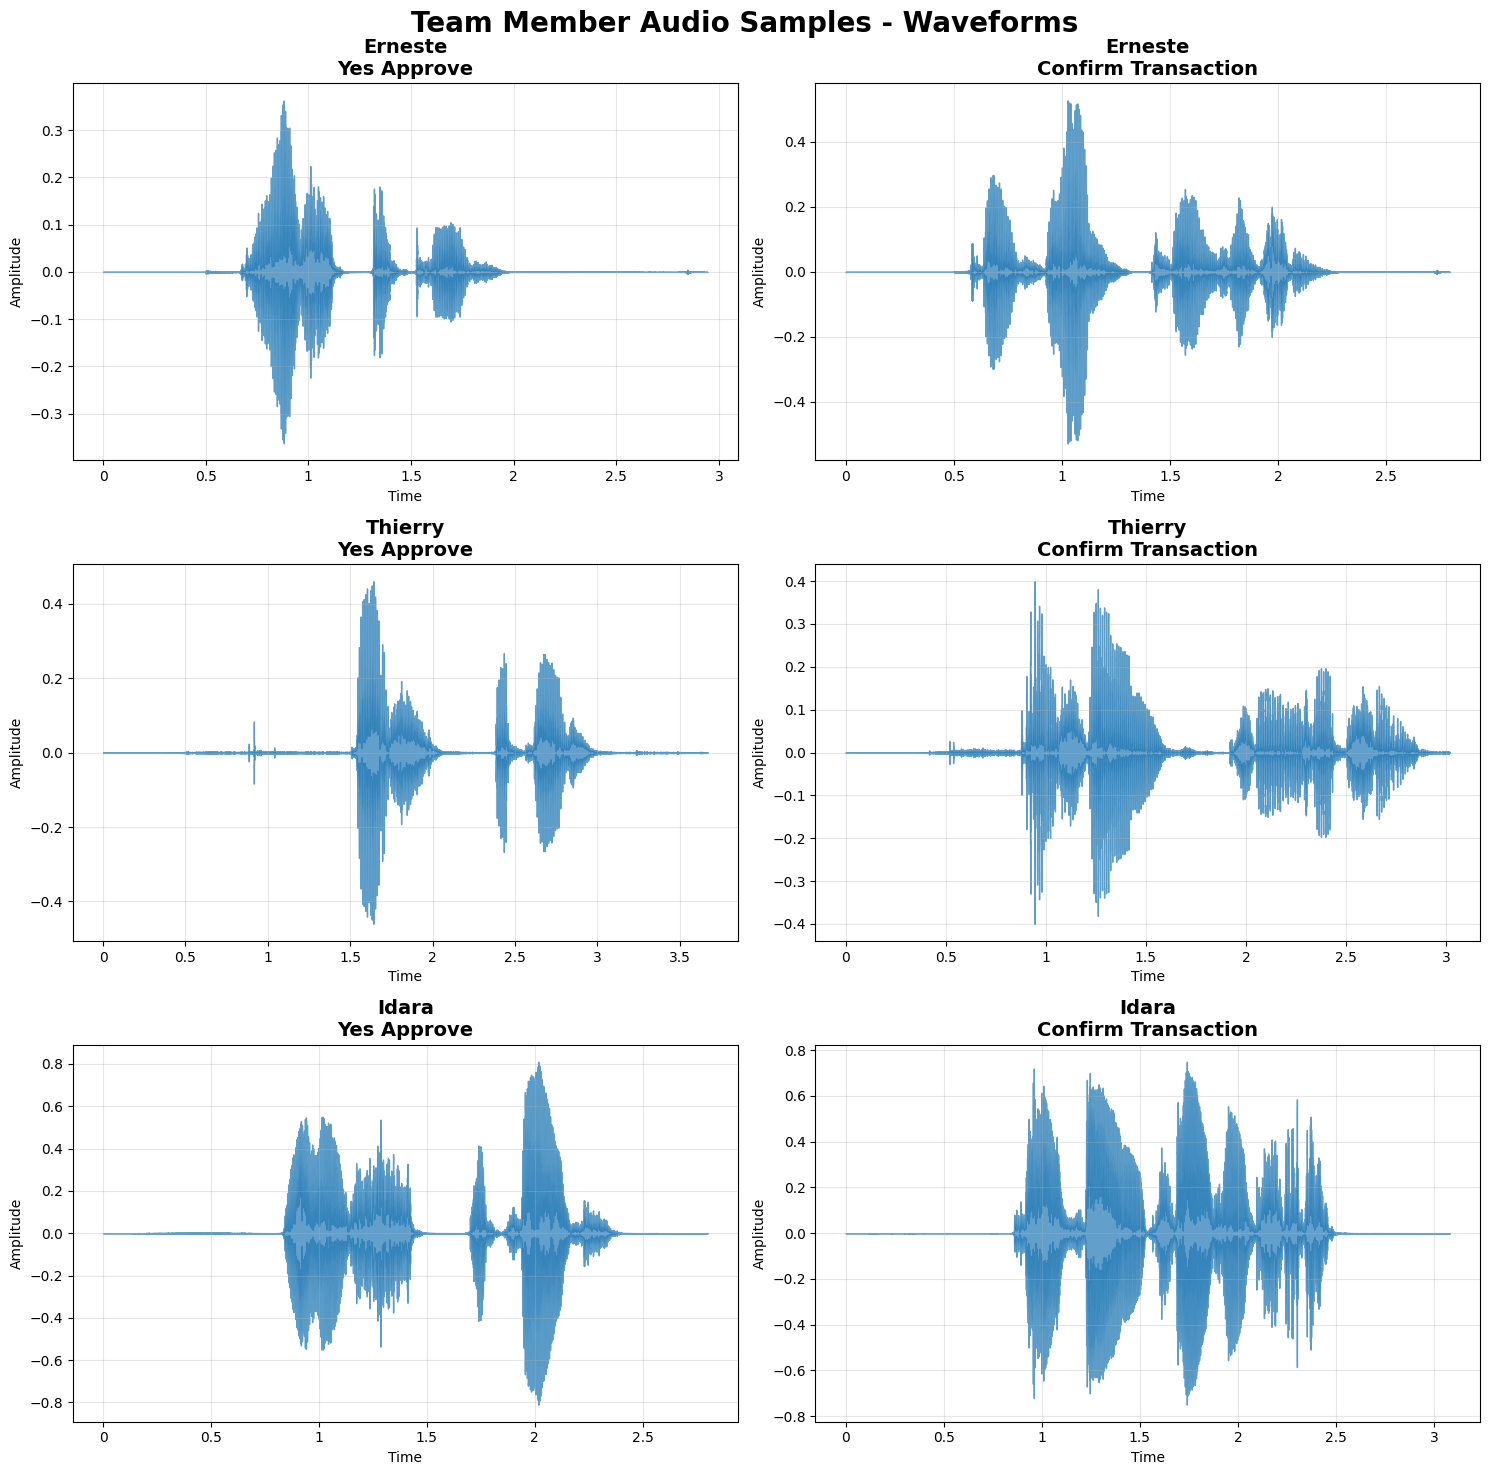

  Saved combined visualization: all_members_combined.png


In [21]:
def create_augmentation_visualizations_for_all():
    """Create augmentation visualizations for all audio files and each member"""
    if not existing_audios:
        print("No audio files available for augmentation visualization")
        return
    
    print("Creating augmentation visualizations for all members...\n")
    
    # Create visualizations for each audio file
    for member, phrase, filename, filepath in existing_audios:
        print(f"Creating augmentation visualization for: {filename}")
        
        try:
            # Load original audio
            y, sr = librosa.load(filepath, sr=None)
            
            if y is None:
                print(f"  Could not load {filename}")
                continue
            
            # Apply augmentations
            base_name = filename.rsplit('.', 1)[0]
            augmented_list = apply_audio_augmentations(y, sr, base_name)
            
            # Create visualization
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle(f'{member} - {phrase.replace("_", " ").title()}\nAudio Augmentations', 
                        fontsize=16, fontweight='bold')
            
            # Original audio spectrogram
            D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
            librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='hz', 
                                   ax=axes[0, 0], cmap='viridis')
            axes[0, 0].set_title('Original', fontsize=12, fontweight='bold')
            axes[0, 0].set_ylabel('Frequency (Hz)')
            
            # Augmented audio spectrograms
            positions = [(0, 1), (1, 0), (1, 1)]
            for idx, ((aug_audio, aug_name, _), (row, col)) in enumerate(zip(augmented_list, positions)):
                D_aug = librosa.amplitude_to_db(np.abs(librosa.stft(aug_audio)), ref=np.max)
                librosa.display.specshow(D_aug, sr=sr, x_axis='time', y_axis='hz', 
                                       ax=axes[row, col], cmap='viridis')
                axes[row, col].set_title(aug_name.replace('_', ' '), fontsize=11)
                if row == 1:
                    axes[row, col].set_ylabel('Frequency (Hz)')
                    axes[row, col].set_xlabel('Time (s)')
            
            plt.tight_layout()
            
            # Save in visualizations folder
            save_path = VISUALIZATIONS_DIR / f"{member}_{phrase}_augmentations.png"
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            plt.show()
            
            print(f"  Saved: {save_path.name}")
            
        except Exception as e:
            print(f"  Error creating visualization for {filename}: {str(e)}")
    
    # Create a combined visualization showing all members
    print("\nCreating combined visualization for all members...")
    create_combined_member_visualization()

def create_combined_member_visualization():
    """Create a combined visualization showing all team members' audio samples"""
    if len(existing_audios) < 2:
        print("  Not enough audio files for combined visualization")
        return
    
    try:
        # Create a grid of visualizations
        num_audios = len(existing_audios)
        cols = 2
        rows = (num_audios + 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        fig.suptitle('Team Member Audio Samples - Waveforms', fontsize=20, fontweight='bold')
        
        # Flatten axes if needed
        if rows == 1:
            axes = axes.reshape(1, -1)
        
        for idx, (member, phrase, filename, filepath) in enumerate(existing_audios):
            if idx >= rows * cols:
                break
                
            row = idx // cols
            col = idx % cols
            
            try:
                y, sr = librosa.load(filepath, sr=None)
                librosa.display.waveshow(y, sr=sr, ax=axes[row, col], alpha=0.7)
                axes[row, col].set_title(f'{member}\n{phrase.replace("_", " ").title()}', 
                                       fontsize=14, fontweight='bold')
                axes[row, col].set_ylabel('Amplitude')
                axes[row, col].grid(True, alpha=0.3)
            except Exception as e:
                axes[row, col].set_title(f'{member}\nError loading audio', color='red')
        
        # Hide empty subplots
        for idx in range(len(existing_audios), rows * cols):
            row = idx // cols
            col = idx % cols
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        
        # Save combined visualization
        save_path = VISUALIZATIONS_DIR / "all_members_combined.png"
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"  Saved combined visualization: {save_path.name}")
        
    except Exception as e:
        print(f"  Error creating combined visualization: {str(e)}")

# Run the augmentation visualizations
create_augmentation_visualizations_for_all()

## 10. Display Summary Statistics

In [22]:
if existing_audios and 'df_features' in locals():
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    print("\nFeatures by Team Member:")
    print(df_features.groupby('member').size())
    
    print("\nFeatures by Phrase:")
    print(df_features.groupby('phrase').size())
    
    print("\nFeatures by Augmentation Type:")
    print(df_features.groupby('augmentation').size())
    
    print("\n" + "="*60)
else:
    print("No features to display - processing was not completed")


SUMMARY STATISTICS

Features by Team Member:
member
Erneste    8
Idara      8
Thierry    8
dtype: int64

Features by Phrase:
phrase
confirm_transaction    12
yes_approve            12
dtype: int64

Features by Augmentation Type:
augmentation
Background_Noise     6
Original             6
Pitch_Shift_+2st     6
Time_Stretch_1.2x    6
dtype: int64



## 11. Preview the Feature DataFrame

In [23]:
if existing_audios and 'df_features' in locals():
    print("\nFirst 5 rows of the feature dataset:\n")
    display(df_features.head())
    
    print("\nDataFrame Information:")
    print(df_features.info())
    
    print("\nBasic Statistics of Numerical Features:")
    display(df_features.describe())
else:
    print("No features available to preview")


First 5 rows of the feature dataset:



member               phrase       augmentation            timestamp  \
0  Erneste          yes_approve           Original  2025-11-12 18:05:26   
1  Erneste          yes_approve   Pitch_Shift_+2st  2025-11-12 18:05:26   
2  Erneste          yes_approve  Time_Stretch_1.2x  2025-11-12 18:05:26   
3  Erneste          yes_approve   Background_Noise  2025-11-12 18:05:26   
4  Erneste  confirm_transaction           Original  2025-11-12 18:05:26   

   sample_rate  duration      mfcc_0      mfcc_1     mfcc_2     mfcc_3  ...  \
0        48000  2.944000 -544.000244   64.125717  -7.260704  10.644255  ...   
1        48000  2.944000 -576.934875   62.546635  -9.947507  11.298633  ...   
2        48000  2.453333 -601.064758   72.333031 -10.830731  11.885284  ...   
3        48000  2.944000 -326.537052   17.566697   2.321965   6.294506  ...   
4        48000  2.794667 -491.879547  112.307716 -11.774263   1.279292  ...   

   chroma_2  chroma_3  chroma_4  chroma_5  chroma_6  chroma_7  chroma_8  \
0  0.384046  0.447306  0.507363  0.374874  0.367683  0.393029  0.439834   
1  0.352663  0.350391  0.404341  0.449431  0.477169  0.373771  0.375039   
2  0.358680  0.432355  0.480946  0.342100  0.342736  0.402432  0.443587   
3  0.663796  0.705933  0.689574  0.638359  0.639037  0.610100  0.652574   
4  0.451011  0.447584  0.343222  0.273692  0.310839  0.347268  0.394472   

   chroma_9  chroma_10  chroma_11  
0  0.502428   0.497949   0.398780  
1  0.398981   0.439535   0.511343  
2  0.486758   0.480624   0.381098  
3  0.703442   0.710058   0.647517  
4  0.460691   0.390569   0.335051  

[5 rows x 52 columns]


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member                  24 non-null     object 
 1   phrase                  24 non-null     object 
 2   augmentation            24 non-null     object 
 3   timestamp               24 non-null     object 
 4   sample_rate             24 non-null     int64  
 5   duration                24 non-null     float64
 6   mfcc_0                  24 non-null     float64
 7   mfcc_1                  24 non-null     float64
 8   mfcc_2                  24 non-null     float64
 9   mfcc_3                  24 non-null     float64
 10  mfcc_4                  24 non-null     float64
 11  mfcc_5                  24 non-null     float64
 12  mfcc_6                  24 non-null     float64
 13  mfcc_7                  24 non-null     float64
 14  mfcc_8              

sample_rate   duration      mfcc_0      mfcc_1     mfcc_2     mfcc_3  \
count     24.000000  24.000000   24.000000   24.000000  24.000000  24.000000   
mean   46700.000000   2.923877 -439.603849   72.099237  -3.607657  11.560922   
std     1878.019308   0.367023   97.059705   29.625821  14.723759   8.655993   
min    44100.000000   2.328896 -601.064758   15.396343 -25.329092  -0.709216   
25%    44100.000000   2.794667 -516.663101   58.888979 -16.303968   4.036792   
50%    48000.000000   2.944000 -458.604462   71.539722  -5.635487  10.829548   
75%    48000.000000   3.062976 -365.199815   91.822628   6.360268  16.302833   
max    48000.000000   3.668753 -275.824219  115.096489  20.641136  26.288027   

          mfcc_4     mfcc_5     mfcc_6     mfcc_7  ...   chroma_2   chroma_3  \
count  24.000000  24.000000  24.000000  24.000000  ...  24.000000  24.000000   
mean    2.352680   0.167305   3.417176  -5.631017  ...   0.453202   0.454236   
std     3.760171   7.888538   3.521681   5.352572  ...   0.119527   0.125176   
min    -4.557185 -13.162341  -3.532387 -18.885080  ...   0.271676   0.277947   
25%    -0.484760  -5.205725   1.417545  -7.837231  ...   0.357278   0.346111   
50%     2.052009  -0.258786   2.775811  -3.324193  ...   0.452536   0.449910   
75%     4.957944   7.683743   5.504162  -1.372026  ...   0.505122   0.503983   
max     9.109633  12.095201   9.971819   0.028740  ...   0.718990   0.713685   

        chroma_4   chroma_5   chroma_6   chroma_7   chroma_8   chroma_9  \
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000   
mean    0.456881   0.453298   0.475955   0.479367   0.507980   0.527821   
std     0.126718   0.127553   0.123298   0.116590   0.107952   0.096580   
min     0.253321   0.260103   0.296298   0.248450   0.287619   0.333232   
25%     0.340029   0.375662   0.365858   0.392793   0.430742   0.462524   
50%     0.463040   0.438955   0.476484   0.452095   0.489996   0.503977   
75%     0.533000   0.534857   0.542179   0.553060   0.574254   0.596378   
max     0.724202   0.685141   0.722732   0.667090   0.694150   0.703442   

       chroma_10  chroma_11  
count  24.000000  24.000000  
mean    0.516822   0.492355  
std     0.092638   0.093609  
min     0.388260   0.323556  
25%     0.443082   0.430820  
50%     0.505579   0.487921  
75%     0.551489   0.534659  
max     0.712363   0.688624  

[8 rows x 48 columns]

## 12. Final Summary & Next Steps

In [24]:
print("\n" + "="*60)
print("NOTEBOOK EXECUTION COMPLETED!")
print("="*60)

if existing_audios and 'df_features' in locals():
    print("\nGenerated Files:")
    print(f"  {OUTPUT_CSV.name} - Feature dataset ({len(df_features)} rows × {len(df_features.columns)} columns)")
    print(f"  {AUGMENTED_DIR.name}/ - {len(all_features) - len(existing_audios)} augmented audios")
    print(f"  {VISUALIZATIONS_DIR.name}/ - All audio visualizations")
    
    # List visualization files
    if VISUALIZATIONS_DIR.exists():
        vis_files = list(VISUALIZATIONS_DIR.glob("*.png"))
        print(f"\nVisualization Files ({len(vis_files)} total):")
        for vis_file in vis_files:
            print(f"    • {vis_file.name}")
    
    print("\nData Summary:")
    print(f"  • Original audios: {len(existing_audios)}")
    print(f"  • Augmented audios: {len(all_features) - len(existing_audios)}")
    print(f"  • Total feature rows: {len(all_features)}")
    print(f"  • Features per audio: {len(df_features.columns)} columns")
else:
    print("\n Processing incomplete - no audio files were found in the Audios folder")
    print("   Please ensure the Audios folder exists at the project root with your audio files")
print("="*60 + "\n")


NOTEBOOK EXECUTION COMPLETED!

Generated Files:
  audio_features.csv - Feature dataset (24 rows × 52 columns)
  Augmented_Audios/ - 18 augmented audios
  Visualizations/ - All audio visualizations

Visualization Files (13 total):
    • all_members_combined.png
    • Erneste_confirm_transaction_augmentations.png
    • Erneste_confirm_transaction_visualization.png
    • Erneste_yes_approve_augmentations.png
    • Erneste_yes_approve_visualization.png
    • Idara_confirm_transaction_augmentations.png
    • Idara_confirm_transaction_visualization.png
    • Idara_yes_approve_augmentations.png
    • Idara_yes_approve_visualization.png
    • Thierry_confirm_transaction_augmentations.png
    • Thierry_confirm_transaction_visualization.png
    • Thierry_yes_approve_augmentations.png
    • Thierry_yes_approve_visualization.png

Data Summary:
  • Original audios: 6
  • Augmented audios: 18
  • Total feature rows: 24
  • Features per audio: 52 columns

